In [1]:
from pathlib import Path
import KED
from KED.reciprocal_lattice import *
from ase import io as aseio

import matplotlib
matplotlib.__version__

'3.4.3'

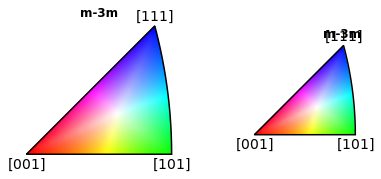

In [2]:
from orix.quaternion import symmetry
from matplotlib import pyplot as plt
from orix import plot
from orix.plot import InversePoleFigurePlot
fig, ax = plt.subplots(ncols=2, subplot_kw=dict(projection="ipf", symmetry=symmetry.Oh))

for a in ax:
    a.plot_ipf_color_key()

# change axes limits of right hand plot
# ax[1].set_xlim(-0.2, 0.6)
# ax[1].set_ylim(-0.5, 0.6)

# change individual text parameters for crystal labels on right hand plot
# ax[1].texts[1].update({'size': 20})
# ax[1].texts[2].set_x(0.1)

ax[1].set_xlim(-0.2)
ax[1].title.set_x(0.9)

In [3]:
a = ax[1]
a.plot_ipf_color_key()

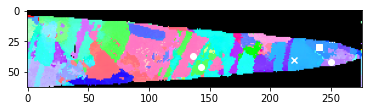

In [43]:
f = r'C:\Users\Patrick Harrison\Documents\Data\Dusseldorf\NiW\2021-07-23 Ni-W tip_ +-80 deg_ 10 deg tilt step\ANG\rec_-60 deg_20210722_135053_000 (full) run3 1.ang'

from KED.io import ANG

a = ANG.from_file(f)

from orix.vector import Vector3d
from orix.quaternion import Rotation
from orix.plot.orientation_color_keys import IPFColorKeyTSL
ipfkey = IPFColorKeyTSL(symmetry.Oh, direction=Vector3d.yvector())

rot_azi = Rotation.from_axes_angles((0, 0, 1), np.deg2rad(56))
c = ipfkey.orientation2color(~(rot_azi * ~a.orientations))
c[~a.mask] = 0

fig, ax = plt.subplots()
ax.imshow(c)

ij1 = (40, 220)
ax.scatter(*ij1[::-1], c='w', marker='x')

o1 = a.orientations[ij1]

ij2 = (30, 240)
ax.scatter(*ij2[::-1], c='w', marker='s')

o2 = a.orientations[ij2]

ij3 = (46, 143)
ax.scatter(*ij3[::-1], c='w')

o3 = a.orientations[ij3]

ij4 = (37, 136)
ax.scatter(*ij4[::-1], c='w')

o4 = a.orientations[ij4]

ij5 = (42, 250)
ax.scatter(*ij5[::-1], c='w')

o5 = a.orientations[ij5]

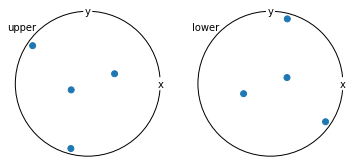

In [27]:
from orix.vector import Miller
from orix.crystal_map import Phase

phase = Phase(point_group=symmetry.Oh)
m111 = Miller(hkl=(1,1,1), phase=phase).symmetrise().unique()

v111 = (rot_azi * ~o1) * m111
v111.scatter(hemisphere='both', axes_labels=['x', 'y', None])
i = np.rad2deg(Vector3d.yvector().angle_with(v111)).argmin()
m111[i]
v1 = v111[i]

In [28]:
np.rad2deg(Vector3d.yvector().angle_with(v111))

array([ 80.75488912, 124.47203543, 164.71776528, 103.76716671,
        55.52796457,  15.28223472,  76.23283329,  99.24511088])

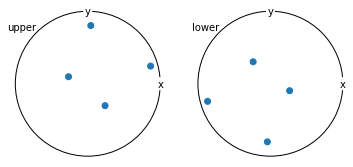

In [29]:
v111 = (rot_azi * ~o2) * m111
v111.scatter(hemisphere='both', axes_labels=['x', 'y', None])
i = np.rad2deg(Vector3d.yvector().angle_with(v111)).argmin()
m111[i]
v2 = v111[i]

In [30]:
np.rad2deg(Vector3d.yvector().angle_with(v111))

array([100.30985795, 167.20323647, 105.5965741 ,  58.17489458,
        12.79676353,  74.4034259 , 121.82510542,  79.69014205])

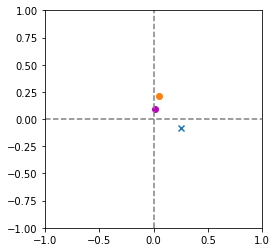

In [46]:
d1, d2, d5 = v1.unit.data.ravel(), v2.unit.data.ravel(), v5.unit.data.ravel()

fig, ax = plt.subplots()
ax.scatter(*d1[[0, 2]], marker='x')
ax.scatter(*d2[[0, 2]])
ax.scatter(*d5[[0, 2]], color='m')

ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)

ax.set_aspect('equal')
ax.axvline(0, ls='dashed', c='gray')
ax.axhline(0, ls='dashed', c='gray')


In [26]:
-np.rad2deg(np.arctan2(d1[2], d1[0]) - np.arctan2(d2[2], d2[0]))

94.07124523212302

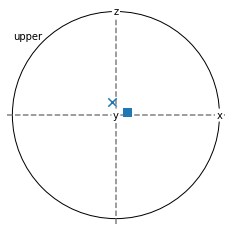

In [41]:
fig, ax = plt.subplots(subplot_kw=dict(projection='stereographic'))
ax.scatter(v1[:, [2, 0, 1]], marker='x', s=70)
ax.scatter(v2[:, [2, 0, 1]], marker='s', s=70)
ax.set_labels('x', 'z', 'y')
ax.show_hemisphere_label()

ax.axhline(0, color='gray', ls='dashed')
ax.axvline(0, color='gray', ls='dashed')

In [9]:
np.rad2deg(np.arctan2(*d2[[2, 0]]) - np.arctan2(*d1[[2, 0]]))

94.07124523212302

7.086827712541129

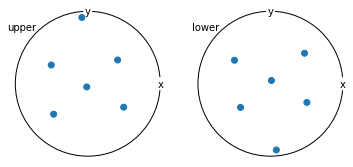

In [10]:
m110 = Miller(hkl=(1,1,0), phase=phase).symmetrise().unique()

((rot_azi * ~o3)).outer(m110).scatter(hemisphere='both', axes_labels=['x', 'y', None])
np.rad2deg(Vector3d.yvector().angle_with(((rot_azi * ~o3)).outer(m110))).min()

5.364920083627446

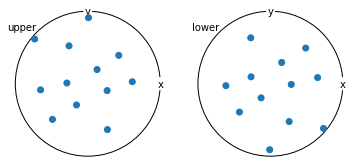

In [11]:
m113 = Miller(hkl=(1,1,3), phase=phase).symmetrise().unique()

((rot_azi * ~o4)).outer(m113).scatter(hemisphere='both', axes_labels=['x', 'y', None])
np.rad2deg(Vector3d.yvector().angle_with(((rot_azi * ~o4)).outer(m113))).min()

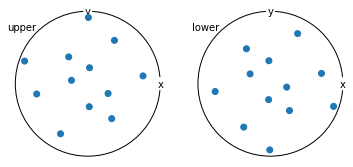

In [44]:
m121 = Miller(hkl=(1,2,1), phase=phase).symmetrise().unique()

v121 = (rot_azi * ~o5) * m121
v121.scatter(hemisphere='both', axes_labels=['x', 'y', None])
i = np.rad2deg(Vector3d.yvector().angle_with(v121)).argmin()
m121[i]
v5 = v121[i]

In [45]:
np.rad2deg(Vector3d.yvector().angle_with(v121))

array([127.87208567, 148.62367243,  70.33497676,  54.80326405,
       114.80248117, 143.27050236,  97.77417807,  75.71724068,
         5.20457608,  79.1891588 , 135.93052363,  84.84714805,
       104.28275932,  65.19751883,  36.72949764,  82.22582193,
        44.06947637,  95.15285195, 174.79542392, 100.8108412 ,
        52.12791433,  31.37632757, 109.66502324, 125.19673595])

In [14]:
0.352 / 6**0.5

0.1437033982432798

In [15]:
0.352 / 11**0.5

0.1061319932913728

In [16]:
0.352 / 9**0.5

0.11733333333333333

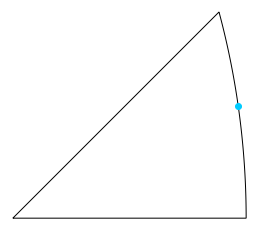

In [17]:


c = IPFColorKeyTSL(symmetry.Oh).direction_color_key.direction2color(Vector3d((2, 1, 2)))
fig = Vector3d((2, 1, 2)).in_fundamental_sector(symmetry.Oh).scatter(return_figure=1, c=c)
ax = fig.axes[0]
ax.restrict_to_sector(symmetry.Oh.fundamental_sector)


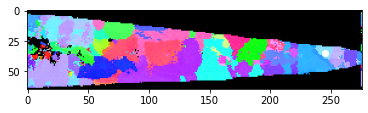

In [18]:
f = r'C:\Users\Patrick Harrison\Documents\Data\Dusseldorf\NiW\2021-07-23 Ni-W tip_ +-80 deg_ 10 deg tilt step\ANG\rec_-30 deg_20210722_132601_000 (full) run3 1.ang'

from KED.io import ANG

a = ANG.from_file(f)

from orix.vector import Vector3d
from orix.quaternion import Rotation
from orix.plot.orientation_color_keys import IPFColorKeyTSL
ipfkey = IPFColorKeyTSL(symmetry.Oh, direction=Vector3d.yvector())

rot_azi = Rotation.from_axes_angles((0, 0, 1), np.deg2rad(56))
c = ipfkey.orientation2color(~(rot_azi * ~a.orientations))
c[~a.mask] = 0

fig, ax = plt.subplots()
ax.imshow(c)

ij5 = (35, 245)
ax.scatter(*ij5[::-1], c='w')

o5 = a.orientations[ij5]

9.031895284598413

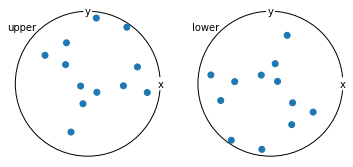

In [19]:
m212 = Miller(hkl=(2,1,2), phase=phase).symmetrise().unique()

((rot_azi * ~o5)).outer(m212).scatter(hemisphere='both', axes_labels=['x', 'y', None])
np.rad2deg(Vector3d.yvector().angle_with(((rot_azi * ~o5)).outer(m212))).min()

In [2]:
cif = aseio.read(Path(KED.__file__).parent.joinpath('data', 'testing', 'Ni.cif'))

hkl = generate_hkl_points(n=4)
recip = reciprocal_vectors(*cif.get_cell().array)
g = calculate_g_vectors(hkl, recip)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
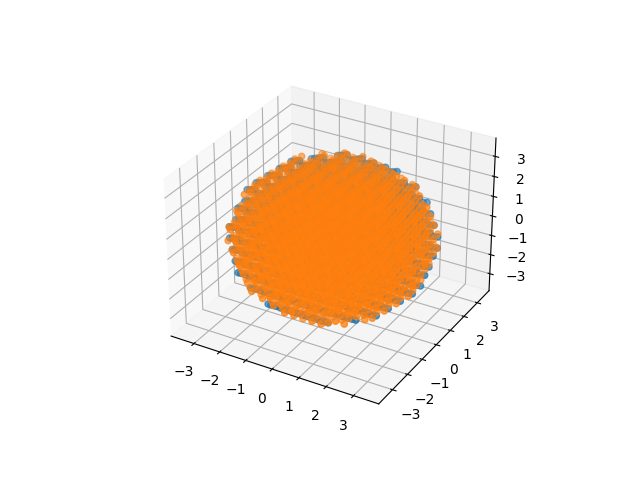

In [3]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from KED.generator import CrystalDiffractionGenerator
generator = CrystalDiffractionGenerator(cif, 200, n=12, max_angle=5)

%matplotlib widget
fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))
ax.scatter(*generator.g.T)

from orix.quaternion import Rotation
from orix.vector import Vector3d, AxAngle

rot = Rotation.from_axes_angles((1, 1, 1), np.deg2rad(60))
g_twin = rot * Vector3d(generator.g)
ax.scatter(*g_twin.data.T)

from scipy.spatial.distance import cdist

dist = cdist(g, g_twin.data)

In [4]:
i, j = np.nonzero(np.isclose(dist, 0))
hkl[i].shape

(62, 3)

In [5]:
a = np.array((1, 1, 1))  # rotation axis
b = np.array((2, -2, 0))
c = np.array((2, 0, -2))

abc = np.array((a, b, c)).T

soln, resid, rank, s = np.linalg.lstsq(abc, hkl[i].T)

/var/folders/7z/vcxskq490b939s8g95s5m0vm0000gn/T/ipykernel_16501/1752345058.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, resid, rank, s = np.linalg.lstsq(abc, hkl[i].T)


In [6]:
np.allclose(soln, soln.round())

True

In [7]:
np.linalg.lstsq?

Signature: np.linalg.lstsq(a, b, rcond='warn')
Docstring:
Return the least-squares solution to a linear matrix equation.

Computes the vector `x` that approximatively solves the equation
``a @ x = b``. The equation may be under-, well-, or over-determined
(i.e., the number of linearly independent rows of `a` can be less than,
equal to, or greater than its number of linearly independent columns).
If `a` is square and of full rank, then `x` (but for round-off error)
is the "exact" solution of the equation. Else, `x` minimizes the
Euclidean 2-norm :math:`||b - ax||`. If there are multiple minimizing 
solutions, the one with the smallest 2-norm :math:`||x||` is returned.

Parameters
----------
a : (M, N) array_like
    "Coefficient" matrix.
b : {(M,), (M, K)} array_like
    Ordinate or "dependent variable" values. If `b` is two-dimensional,
    the least-squares solution is calculated for each of the `K` columns
    of `b`.
rcond : float, optional
    Cut-off ratio for small singular value

In [8]:
v1, v2 = (0,0,1), (0,1,0)

cross = np.cross(v1, v2)
np.rad2deg(np.arcsin(np.linalg.norm(cross / (np.linalg.norm(v1) * np.linalg.norm(v2)))))
cross

array([-1,  0,  0])

In [9]:
v2 = template.hkl[template.g.dot((1,0,0)).argmax()]
template.hkl[np.linalg.norm(np.cross(v2, template.hkl,), axis=-1).argsort()[::-1][1]]

NameError: name 'template' is not defined

In [ ]:
template.hkl

NameError: name 'template' is not defined

<AxesSubplot:xlabel='$\\AA$', ylabel='$\\AA$'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
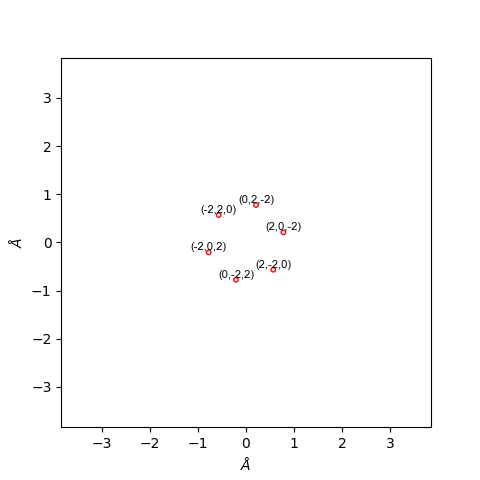

In [30]:
from KED.orientations import rotation_between_vectors
rot = rotation_between_vectors((0,0,1), (-1,-1,1))
# np.rad2deg(AxAngle.from_rotation(rot).angle)

generator = CrystalDiffractionGenerator(cif, 200, n=3, max_angle=5)
template = generator.generate_templates(~rot, flip=False)
template.plot(labels=True)

In [11]:
generator.remove_twinned_reflections((1,1,1))

/Users/paddyharrison/Documents/GitHub/KED/KED/generator.py:224: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  v123 = np.array((v1.data, v2, v3))


LinAlgError: 1-dimensional array given. Array must be two-dimensional

/var/folders/7z/vcxskq490b939s8g95s5m0vm0000gn/T/ipykernel_16501/282600846.py:36: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  soln, *_ = np.linalg.lstsq(v123.T, generator.hkl.T)


<AxesSubplot:xlabel='$\\AA$', ylabel='$\\AA$'>

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
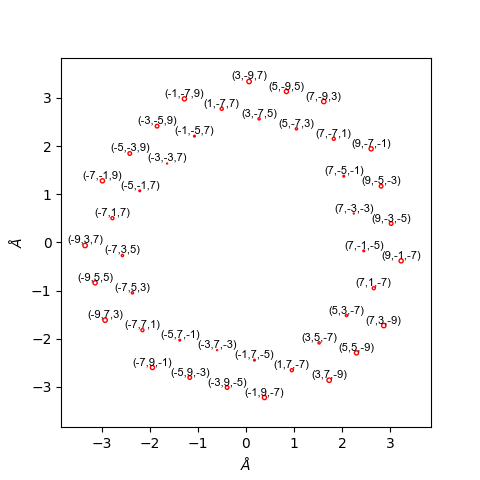

In [55]:
generator = CrystalDiffractionGenerator(cif, 200, n=12, max_angle=5)

twin_axis = (1, 1, 1)

v1 = np.array(twin_axis).ravel()
if v1.size != 3 or not np.allclose(np.abs(v1), np.abs(v1[0])) or not np.allclose(np.linalg.norm(v1), 3**0.5):
    raise ValueError("twin_axis should be a single <111> vector.")
rot = rotation_between_vectors((0,0,1), v1)
# get unit vectors from template
g = generator.g
hkl = generator.hkl
norms = np.linalg.norm(hkl, axis=-1)
# get in-twin-plane unit vectors, closest to direct beam
mask = np.isclose(norms, 8**0.5)  # the twinned spots have hkl <220>
g = g[mask]
hkl = hkl[mask]
norms = norms[mask]
# of these vectors, they must be perpendicular to the titl axis
# ie. in the twin plane
dot_products = hkl.dot(twin_axis)
mask = np.isclose(dot_products, 0)
g = g[mask]
hkl = hkl[mask]
norms = norms[mask]
# generate rotated g as in template
g = (~rot * Vector3d(g)).data
# choose vector most parallel to x as v2
v2 = hkl[g.dot((1, 0, 0)).argmax()]
# choose vector most perpendicular to v2 as v3
cross_products = np.linalg.norm(np.cross(v2, hkl), axis=-1)
v3 = hkl[cross_products.argmax()]
# v2 and v3 are in the twin plane, v1 is perpendicular to these
# and is the twin axis. Any hkl that can be made as a
# combination of these vectors are shared and are removed
v123 = np.array((v1.data, v2, v3))
soln, *_ = np.linalg.lstsq(v123.T, generator.hkl.T)
# get the soln which are the same after rounding, ie. integer
# solutions
mask = np.isclose(soln.T, np.round(soln.T)).all(axis=-1)
generator._mask_data(np.logical_not(mask))

t = generator.generate_templates(rot)
t.plot(labels=True)

In [51]:
generator.hkl

array([[-3, -3, -1],
       [-3, -3,  1],
       [-1, -3, -3],
       [-1, -3, -1],
       [-1, -3,  3],
       [ 1, -3, -3],
       [ 1, -3,  1],
       [ 1, -3,  3],
       [ 3, -3, -1],
       [ 3, -3,  1],
       [-2, -2,  0],
       [-2, -2,  2],
       [ 0, -2, -2],
       [ 0, -2,  0],
       [ 2, -2, -2],
       [ 2, -2,  2],
       [-3, -1, -3],
       [-3, -1, -1],
       [-3, -1,  3],
       [-1, -1, -3],
       [-1, -1,  1],
       [-1, -1,  3],
       [ 1, -1, -1],
       [ 1, -1,  1],
       [ 3, -1, -3],
       [ 3, -1, -1],
       [ 3, -1,  3],
       [-2,  0, -2],
       [-2,  0,  0],
       [ 0,  0, -2],
       [ 0,  0,  2],
       [ 2,  0,  0],
       [ 2,  0,  2],
       [-3,  1, -3],
       [-3,  1,  1],
       [-3,  1,  3],
       [-1,  1, -1],
       [-1,  1,  1],
       [ 1,  1, -3],
       [ 1,  1, -1],
       [ 1,  1,  3],
       [ 3,  1, -3],
       [ 3,  1,  1],
       [ 3,  1,  3],
       [-2,  2, -2],
       [-2,  2,  2],
       [ 0,  2,  0],
       [ 0,  

In [17]:
np.dot((0, 2, 2), (1, 1, 1))

4

In [25]:
norms = np.linalg.norm(generator.hkl, axis=-1)
mask = np.isclose(norms, 8**0.5)
np.count_nonzero(mask)

12

In [28]:
np.dot(generator.hkl[mask], (1, -1, 1))

array([ 0,  0,  4,  4, -4,  0,  0,  4, -4, -4,  0,  0])

In [27]:
array([-4, -4,  0,  0, -4,  0,  0,  4,  0,  0,  4,  4])

array([[-2, -2,  0],
       [ 0, -2, -2],
       [ 0, -2,  2],
       [ 2, -2,  0],
       [-2,  0, -2],
       [-2,  0,  2],
       [ 2,  0, -2],
       [ 2,  0,  2],
       [-2,  2,  0],
       [ 0,  2, -2],
       [ 0,  2,  2],
       [ 2,  2,  0]])